## 불러오기

In [227]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dbfread import DBF
from haversine import haversine
from tqdm.notebook import tqdm
%matplotlib inline
import platform
import pickle
import re
platform.system()
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정
%config InlineBackend.figure_format = 'retina'
!pip install dbfread
!pip install haversine

출처:https://data.seoul.go.kr/dataList/OA-12912/A/1/datasetView.do

In [41]:
bus_date1 = pd.read_csv('./BUS_STATION_BOARDING_MONTH_202001.csv',encoding = 'cp949')
bus_date2 = pd.read_csv('./BUS_STATION_BOARDING_MONTH_202002.csv',encoding = 'cp949')
bus_date3 = pd.read_csv('./BUS_STATION_BOARDING_MONTH_202003.csv',encoding = 'cp949')
bus_date4 = pd.read_csv('./BUS_STATION_BOARDING_MONTH_202004.csv',encoding = 'cp949')
bus_date5 = pd.read_csv('./BUS_STATION_BOARDING_MONTH_202005.csv',encoding = 'cp949')
bus_date6 = pd.read_csv('./BUS_STATION_BOARDING_MONTH_202006.csv',encoding = 'cp949')
bus_date7 = pd.read_csv('./BUS_STATION_BOARDING_MONTH_202007.csv',encoding = 'cp949')

### 함수만들어서 필요한 칼럼만 뽑아주기

In [20]:
def bus_prepro(df):
    df_prepro = df[['사용일자', '역명', '승차총승객수', '하차총승객수']]
    df_prepro.columns =  ['사용일자', '역명', '승차총승객수', '하차총승객수']
    return df_prepro

### 서울시 데이터의 오류와 변동사항
1. 5월, 6월의 사용일자가 잘못되었다.
2. 7월부터 컬럼명이 영어로 바뀌었다.

In [46]:
bus_date5

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자
20200501,11110155,1154,1154번(하계동~장암동),11358,롯데마트,146,13,20200504
20200501,11110814,1167,1167번(우이동~은행사거리),10337,방학중학교,21,70,20200504
20200501,11110957,3316,3316번(마천동~천호역),24279,종점,31,0,20200504
20200501,91000034,9714,9714번(교하운정~서울역),12008,디지털미디어시티역,20,2,20200504
20200501,11110966,320,320번(송파차고지~상봉터미널),07313,동원시장,188,80,20200504
...,...,...,...,...,...,...,...,...
20200531,11110056,601,601번(개화동~종로4가),16013,발산역,90,322,20200603
20200531,41110065,6638,6638번(철산동~오목교),38075,철산우성아파트,0,34,20200603
20200531,41110065,6638,6638번(철산동~오목교),17166,경인중학교,152,60,20200603
20200531,41110065,6638,6638번(철산동~오목교),38062,세풍운수종점,12,1,20200603


In [43]:
bus_date6

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자
20200601,41110116,9709,9709번(파주시 맥금동~서울역),12023,불광역3호선.서울혁신파크,7,1,20200604
20200601,41110116,9709,9709번(파주시 맥금동~서울역),12026,한전성서지사.북한산푸르지오,5,5,20200604
20200601,41110116,9709,9709번(파주시 맥금동~서울역),12025,한전성서지사.북한산푸르지오,1,2,20200604
20200601,41110116,9709,9709번(파주시 맥금동~서울역),12028,녹번역,3,8,20200604
20200601,41110116,9709,9709번(파주시 맥금동~서울역),12027,녹번역,9,3,20200604
...,...,...,...,...,...,...,...,...
20200630,91000034,9714,9714번(교하운정~서울역),63657,트리플메디컬타운,90,1,20200703
20200630,91000034,9714,9714번(교하운정~서울역),63659,중앙공원,32,0,20200703
20200630,91000034,9714,9714번(교하운정~서울역),63674,책향기마을,38,1,20200703
20200630,91000034,9714,9714번(교하운정~서울역),36601,대화역,18,71,20200703


In [21]:
bus_date7

,use_dt,bus_route_id,bus_route_no,bus_route_nm,bsst_ars_no,bus_sta_nm,ride_pasgr_num,alight_pasgr_num,work_dt
0,20200701,11110001,100,100번(하계동~용산구청),11428,한성여객종점,19,8,20200704
1,20200701,11110001,100,100번(하계동~용산구청),11373,중계역,51,9,20200704
2,20200701,11110001,100,100번(하계동~용산구청),11376,중계역2번출구,121,22,20200704
3,20200701,11110001,100,100번(하계동~용산구청),11426,하계역,579,238,20200704
4,20200701,11110001,100,100번(하계동~용산구청),08009,삼선교.한성대학교,131,259,20200704
...,...,...,...,...,...,...,...,...,...
1202638,20200731,91000034,9714,9714번(교하운정~서울역),35626,행신초등학교(중),7,21,20200803
1202639,20200731,91000034,9714,9714번(교하운정~서울역),63656,청석마을8단지,0,31,20200803
1202640,20200731,91000034,9714,9714번(교하운정~서울역),13005,모래내시장.가좌역,5,10,20200803
1202641,20200731,91000034,9714,9714번(교하운정~서울역),12008,디지털미디어시티역,25,1,20200803


## 해결하기 위해 함수만들고, 적용

In [58]:
#5,6월용 함수
def bus_prepro56(df):
    df_new = df.reset_index()
    df_prepro = df_new[['index', '역명', '승차총승객수', '하차총승객수']]
    df_prepro.columns =  ['사용일자', '역명', '승차총승객수', '하차총승객수']
    return df_prepro

In [59]:
#7월용 함수
def bus_prepro7(df):
    df_prepro = df[['use_dt', 'bus_sta_nm', 'ride_pasgr_num', 'alight_pasgr_num']]
    df_prepro.columns =  ['사용일자', '역명', '승차총승객수', '하차총승객수']
    return df_prepro

In [60]:
bus_date1 = bus_prepro(bus_date1)
bus_date2 = bus_prepro(bus_date2)
bus_date3 = bus_prepro(bus_date3)
bus_date4 = bus_prepro(bus_date4)
bus_date5 = bus_prepro56(bus_date5)
bus_date6 = bus_prepro56(bus_date6)
bus_date7 = bus_prepro7(bus_date7)

In [61]:
bus_date1

,사용일자,역명,승차총승객수,하차총승객수
0,20200101,왕십리역,0,13
1,20200101,행당1동주민센터.성동소방서,2,3
2,20200101,성동교남단,0,2
3,20200101,성수사거리,0,3
4,20200101,국립서울병원앞,1,0
...,...,...,...,...
1192911,20200131,번동주공1단지,131,23
1192912,20200131,월계2교.참누리아파트,156,64
1192913,20200131,새석관시장,195,92
1192914,20200131,장삼주유소,27,31


In [62]:
bus_date5

,사용일자,역명,승차총승객수,하차총승객수
0,20200501,롯데마트,146,13
1,20200501,방학중학교,21,70
2,20200501,종점,31,0
3,20200501,디지털미디어시티역,20,2
4,20200501,동원시장,188,80
...,...,...,...,...
1199569,20200531,발산역,90,322
1199570,20200531,철산우성아파트,0,34
1199571,20200531,경인중학교,152,60
1199572,20200531,세풍운수종점,12,1


In [63]:
bus_date7

,사용일자,역명,승차총승객수,하차총승객수
0,20200701,한성여객종점,19,8
1,20200701,중계역,51,9
2,20200701,중계역2번출구,121,22
3,20200701,하계역,579,238
4,20200701,삼선교.한성대학교,131,259
...,...,...,...,...
1202638,20200731,행신초등학교(중),7,21
1202639,20200731,청석마을8단지,0,31
1202640,20200731,모래내시장.가좌역,5,10
1202641,20200731,디지털미디어시티역,25,1


## 사용일자, 역명으로 묶어주기

In [64]:
def groupping(df):
    group = df.groupby(['사용일자', '역명']).sum()
    group.reset_index(inplace=True)
    group = group.dropna()
    return group

In [65]:
bus_date1 = groupping(bus_date1)
bus_date2 = groupping(bus_date2)
bus_date3 = groupping(bus_date3)
bus_date4 = groupping(bus_date4)
bus_date5 = groupping(bus_date5)
bus_date6 = groupping(bus_date6)
bus_date7 = groupping(bus_date7)

In [184]:
bus_date1.head(60)

,사용일자,승차총승객수,하차총승객수,지하철역
역명,,,,
123전자타운.2001아울렛,20200101,328,350,양천구청
123전자타운.2001아울렛,20200102,621,770,양천구청
123전자타운.2001아울렛,20200103,700,856,양천구청
123전자타운.2001아울렛,20200104,674,619,양천구청
123전자타운.2001아울렛,20200105,345,441,양천구청
123전자타운.2001아울렛,20200106,641,784,양천구청
123전자타운.2001아울렛,20200107,707,856,양천구청
123전자타운.2001아울렛,20200108,714,852,양천구청
123전자타운.2001아울렛,20200109,667,881,양천구청


In [67]:
station_mapping = pd.read_csv('busNAME_Train_station_mapping.csv', index_col=0)
station_mapping

,역명,지하철역
0,종로2가사거리,종로3가(탑골공원)
1,창경궁.서울대학교병원,혜화
2,명륜3가.성대입구,혜화
3,종로2가.삼일교,을지로3가
4,혜화동로터리.여운형활동터,한성대입구(삼선교)
...,...,...
6999,강일리버파크1단지정문,상일동
7000,굽은다리역,굽은다리(강동구민회관앞)
7001,천호우체국.로데오거리,천호(풍납토성)
7002,조일약국,강동구청


### 라벨링이랑 각 일별이랑 합쳐주자

In [68]:
def merging(df, station_mapping):
    merged = pd.merge(df, station_mapping, how='inner', on='역명')
    merged.set_index('역명', drop=True, inplace=True)
    merged = merged.dropna()
    return merged

In [69]:
bus_date1 = merging(bus_date1, station_mapping)
bus_date2 = merging(bus_date2, station_mapping)
bus_date3 = merging(bus_date3, station_mapping)
bus_date4 = merging(bus_date4, station_mapping)
bus_date5 = merging(bus_date5, station_mapping)
bus_date6 = merging(bus_date6, station_mapping)
bus_date7 = merging(bus_date7, station_mapping)

In [70]:
bus_date1

,사용일자,승차총승객수,하차총승객수,지하철역
역명,,,,
123전자타운.2001아울렛,20200101,328,350,양천구청
123전자타운.2001아울렛,20200102,621,770,양천구청
123전자타운.2001아울렛,20200103,700,856,양천구청
123전자타운.2001아울렛,20200104,674,619,양천구청
123전자타운.2001아울렛,20200105,345,441,양천구청
...,...,...,...,...
신촌푸르지오아파트1단지후문,20200130,136,267,이대
신촌푸르지오아파트1단지후문,20200131,129,278,이대
청파시장,20200129,25,83,숙대입구(갈월)


### 28개 미만으로 나오는 정류장들은 제거

In [71]:
def morethan(df):
    df_index = list(set(list(df.index)))
    for idx in df_index:
        if len(df.loc[idx]) > 27:
            pass
        else:
            df = df.drop([idx])
    return df

In [72]:
bus_date1 = morethan(bus_date1)
bus_date2 = morethan(bus_date2)
bus_date3 = morethan(bus_date3)
bus_date4 = morethan(bus_date4)
bus_date5 = morethan(bus_date5)
bus_date6 = morethan(bus_date6)
bus_date7 = morethan(bus_date7)

In [73]:
#역명으로 살아남고 날짜 다 있는 정류장 갯수
bus_list = [bus_date1,bus_date2,bus_date3,bus_date4,bus_date5,bus_date6,bus_date7]
for bus in bus_list:
    print(len(bus.index.unique()))

6486
6501
6510
6487
6492
6469
6461


In [74]:
bus_date1

,사용일자,승차총승객수,하차총승객수,지하철역
역명,,,,
123전자타운.2001아울렛,20200101,328,350,양천구청
123전자타운.2001아울렛,20200102,621,770,양천구청
123전자타운.2001아울렛,20200103,700,856,양천구청
123전자타운.2001아울렛,20200104,674,619,양천구청
123전자타운.2001아울렛,20200105,345,441,양천구청
...,...,...,...,...
바다마을아파트,20200127,1,2,보라매
바다마을아파트,20200128,7,8,보라매
바다마을아파트,20200129,3,2,보라매


In [76]:
bus_date1.to_csv('2001버스 일자별 승하차인원.csv')
bus_date2.to_csv('2002버스 일자별 승하차인원.csv')
bus_date3.to_csv('2003버스 일자별 승하차인원.csv')
bus_date4.to_csv('2004버스 일자별 승하차인원.csv')
bus_date5.to_csv('2005버스 일자별 승하차인원.csv')
bus_date6.to_csv('2006버스 일자별 승하차인원.csv')
bus_date7.to_csv('2007버스 일자별 승하차인원.csv')

# 여기부터 돌아가면 된다.

In [116]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dbfread import DBF
from haversine import haversine
from tqdm.notebook import tqdm
%matplotlib inline
import platform
platform.system()
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정
%config InlineBackend.figure_format = 'retina'
!pip install dbfread
!pip install haversine

In [117]:
bus_date_1 = pd.read_csv('2001버스 일자별 승하차인원.csv', index_col=0)
bus_date_2 = pd.read_csv('2002버스 일자별 승하차인원.csv', index_col=0)
bus_date_3 = pd.read_csv('2003버스 일자별 승하차인원.csv', index_col=0)
bus_date_4 = pd.read_csv('2004버스 일자별 승하차인원.csv', index_col=0)
bus_date_5 = pd.read_csv('2005버스 일자별 승하차인원.csv', index_col=0)
bus_date_6 = pd.read_csv('2006버스 일자별 승하차인원.csv', index_col=0)
bus_date_7 = pd.read_csv('2007버스 일자별 승하차인원.csv', index_col=0)

In [118]:
bus_date_1

,사용일자,승차총승객수,하차총승객수,지하철역
역명,,,,
123전자타운.2001아울렛,20200101,328,350,양천구청
123전자타운.2001아울렛,20200102,621,770,양천구청
123전자타운.2001아울렛,20200103,700,856,양천구청
123전자타운.2001아울렛,20200104,674,619,양천구청
123전자타운.2001아울렛,20200105,345,441,양천구청
...,...,...,...,...
바다마을아파트,20200127,1,2,보라매
바다마을아파트,20200128,7,8,보라매
바다마을아파트,20200129,3,2,보라매


# 전철역 가까운 버스정류장끼리 묶어주고, 더해주고, 보기편하게 완성

In [119]:
#수범형 지하철유동인구 파일에서 가져온 중구 노원구 전철역
Seoul_junggu = ['서대문', '충정로', '시청', '회현', '서울역', '을지로입구', '명동', '을지로3가', '을지로4가', '충무로', '동대입구', '약수', '버티고개', '청구', '신당', '동대문역사문화공원', ]
Seoul_nowon = ['수락산', '마들', '노원', '중계', '하계', '월계', '광운대', '석계', '태릉입구', '화랑대', '공릉', '상계', '당고개']

In [120]:
def up_prepro(df):
    df_station = df.reset_index()
    df_up = df_station[['사용일자', '역명', '승차총승객수','지하철역']].groupby(['지하철역','사용일자', '역명']).sum()
    df_up_new = df_up.reset_index()
    df_new = df_up_new.set_index('지하철역')
    return df_new

In [121]:
def down_prepro(df):
    df_station = df.reset_index()
    df_down = df_station[['사용일자', '역명', '하차총승객수','지하철역']].groupby(['지하철역','사용일자', '역명']).sum()
    df_down_new = df_down.reset_index()
    df_new = df_down_new.set_index('지하철역')
    return df_new

In [122]:
#up은 승차, down은 하차, 1-7은 2020년의 몇월인지.
bt_up_1 = up_prepro(bus_date_1)
bt_down_1 = down_prepro(bus_date_1)
bt_up_2 = up_prepro(bus_date_2)
bt_down_2 = down_prepro(bus_date_2)
bt_up_3 = up_prepro(bus_date_3)
bt_down_3 = down_prepro(bus_date_3)
bt_up_4 = up_prepro(bus_date_4)
bt_down_4 = down_prepro(bus_date_4)
bt_up_5 = up_prepro(bus_date_5)
bt_down_5 = down_prepro(bus_date_5)
bt_up_6 = up_prepro(bus_date_6)
bt_down_6 = down_prepro(bus_date_6)
bt_up_7 = up_prepro(bus_date_7)
bt_down_7 = down_prepro(bus_date_7)

In [187]:
bt_down_1

,사용일자,역명,하차총승객수
지하철역,,,
가락시장,20200101,가락시장.가락몰,289
가락시장,20200101,가락시장.가락시장역,2589
가락시장,20200101,가락시장남문,115
가락시장,20200101,가락시장역,248
가락시장,20200101,건너말공원입구,302
...,...,...,...
효창공원앞,20200131,효창공원삼거리.윤봉길의사등묘역,190
효창공원앞,20200131,효창공원앞역,1624
효창공원앞,20200131,효창공원역,335


In [188]:
bt_up_5.head(60)

,사용일자,역명,승차총승객수
지하철역,,,
가락시장,20200501,가락시장.가락몰,476
가락시장,20200501,가락시장.가락시장역,4485
가락시장,20200501,가락시장남문,318
가락시장,20200501,가락시장역,575
가락시장,20200501,건너말공원입구,105
가락시장,20200501,경찰병원.서울동부고용노동지청,492
가락시장,20200501,문정2동주민센터.청소년수련관,396
가락시장,20200501,제일오피스텔,134
가락시장,20200501,훼미리근린공원,430


### 지하철역근처, 사용일자마다 어떤 역에서 승하차를 총 몇명이 했는지 나옴(알디노쌤 얘기하신 '블럭'컨셉을 '정류장블럭'정도로 계산할 수 있을 듯)

### 혹시 역 근처 전체 승하차 보고싶을까봐 함수 하나 더 만들기

In [189]:
def up_preproT(df):
    df_station = df.reset_index()
    df_up = df_station[['사용일자', '승차총승객수','지하철역']].groupby(['지하철역','사용일자']).sum()
    df_up_new = df_up.reset_index()
    df_new = df_up_new.set_index('지하철역')
    return df_new

In [190]:
def down_preproT(df):
    df_station = df.reset_index()
    df_down = df_station[['사용일자', '하차총승객수','지하철역']].groupby(['지하철역','사용일자']).sum()
    df_down_new = df_down.reset_index()
    df_new = df_down_new.set_index('지하철역')
    return df_new

In [127]:
#up은 승차, down은 하차, 1-7은 2020년의 몇월인지.
btT_up_1 = up_preproT(bus_date_1)
btT_down_1 = down_preproT(bus_date_1)
btT_up_2 = up_preproT(bus_date_2)
btT_down_2 = down_preproT(bus_date_2)
btT_up_3 = up_preproT(bus_date_3)
btT_down_3 = down_preproT(bus_date_3)
btT_up_4 = up_preproT(bus_date_4)
btT_down_4 = down_preproT(bus_date_4)
btT_up_5 = up_preproT(bus_date_5)
btT_down_5 = down_preproT(bus_date_5)
btT_up_6 = up_preproT(bus_date_6)
btT_down_6 = down_preproT(bus_date_6)
btT_up_7 = up_preproT(bus_date_7)
btT_down_7 = down_preproT(bus_date_7)

In [186]:
btT_up_1.head(60)

,사용일자,승차총승객수
지하철역,,
가락시장,20200101,4766
가락시장,20200102,10665
가락시장,20200103,12115
가락시장,20200104,9038
가락시장,20200105,5944
가락시장,20200106,11932
가락시장,20200107,11335
가락시장,20200108,12161
가락시장,20200109,12109


## 간단한 시각화(한달 간격으로 승하차인원이 어떻게 변하는지 보여줌)

In [181]:
def drawing(df, station):
    bt_index = df.index
    bt_index = list(bt_index)
    bt_index
    if station in bt_index:
        temp = df.loc[station]
        temp.iloc[:, 1:].plot(figsize=(20,10))
        plt.title("{}역 주위 버스 일단위 승하차".format(station))
        plt.xlabel("Time")        
        plt.ylabel("Number of Population")
        plt.grid()
        plt.show()
    else:
        print('{}역은 데이터에 존재하지 않습니다'.format(station))
        

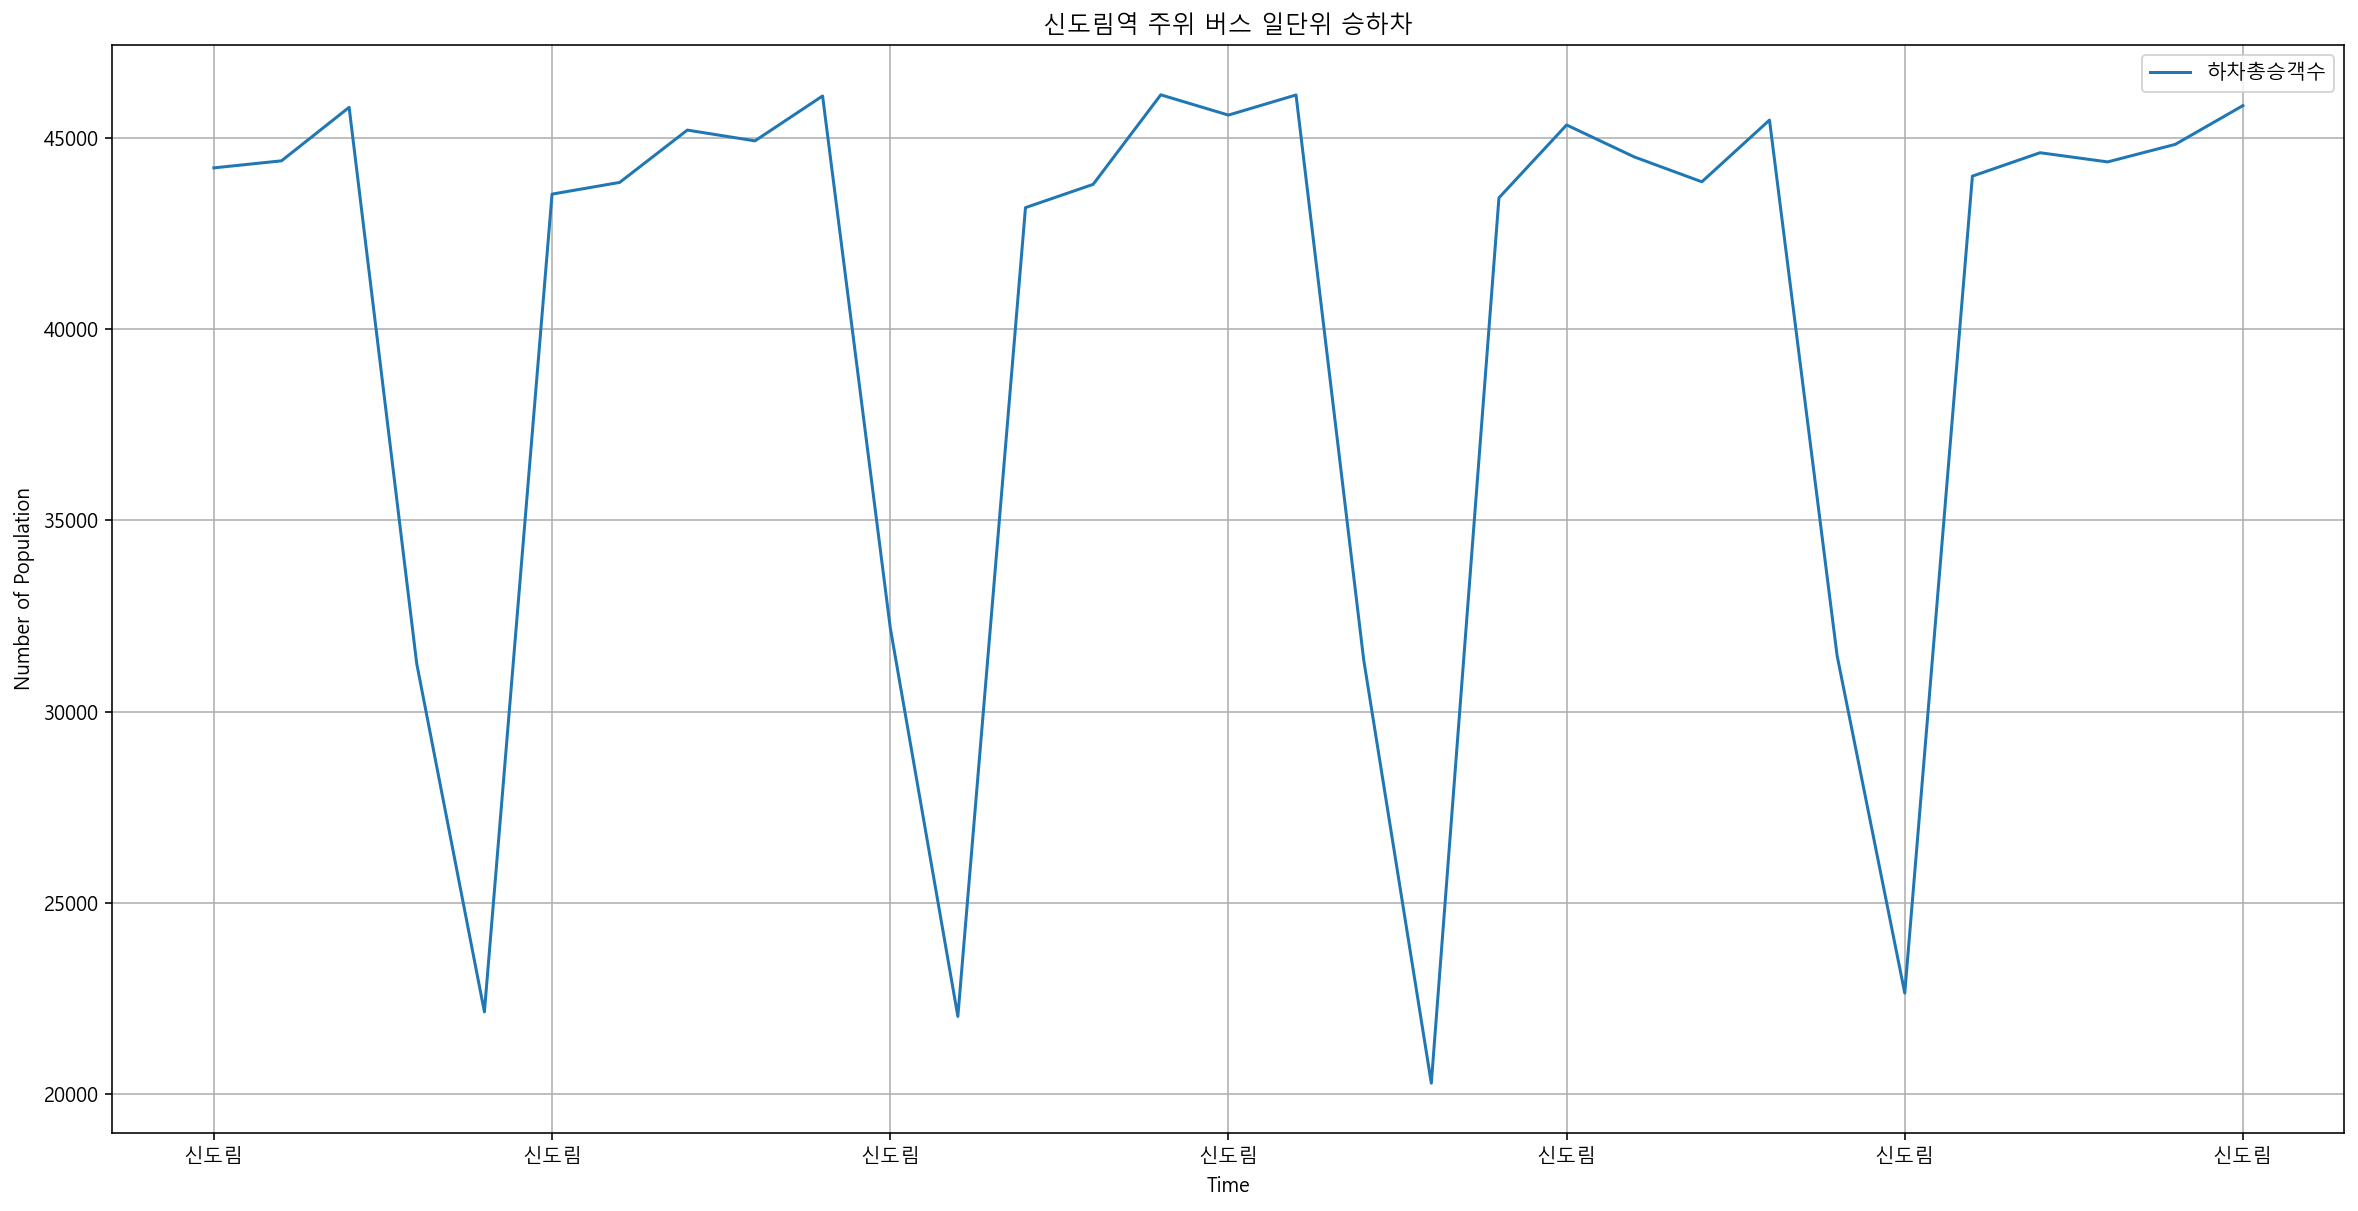

In [182]:
drawing(btT_down_7, '신도림')

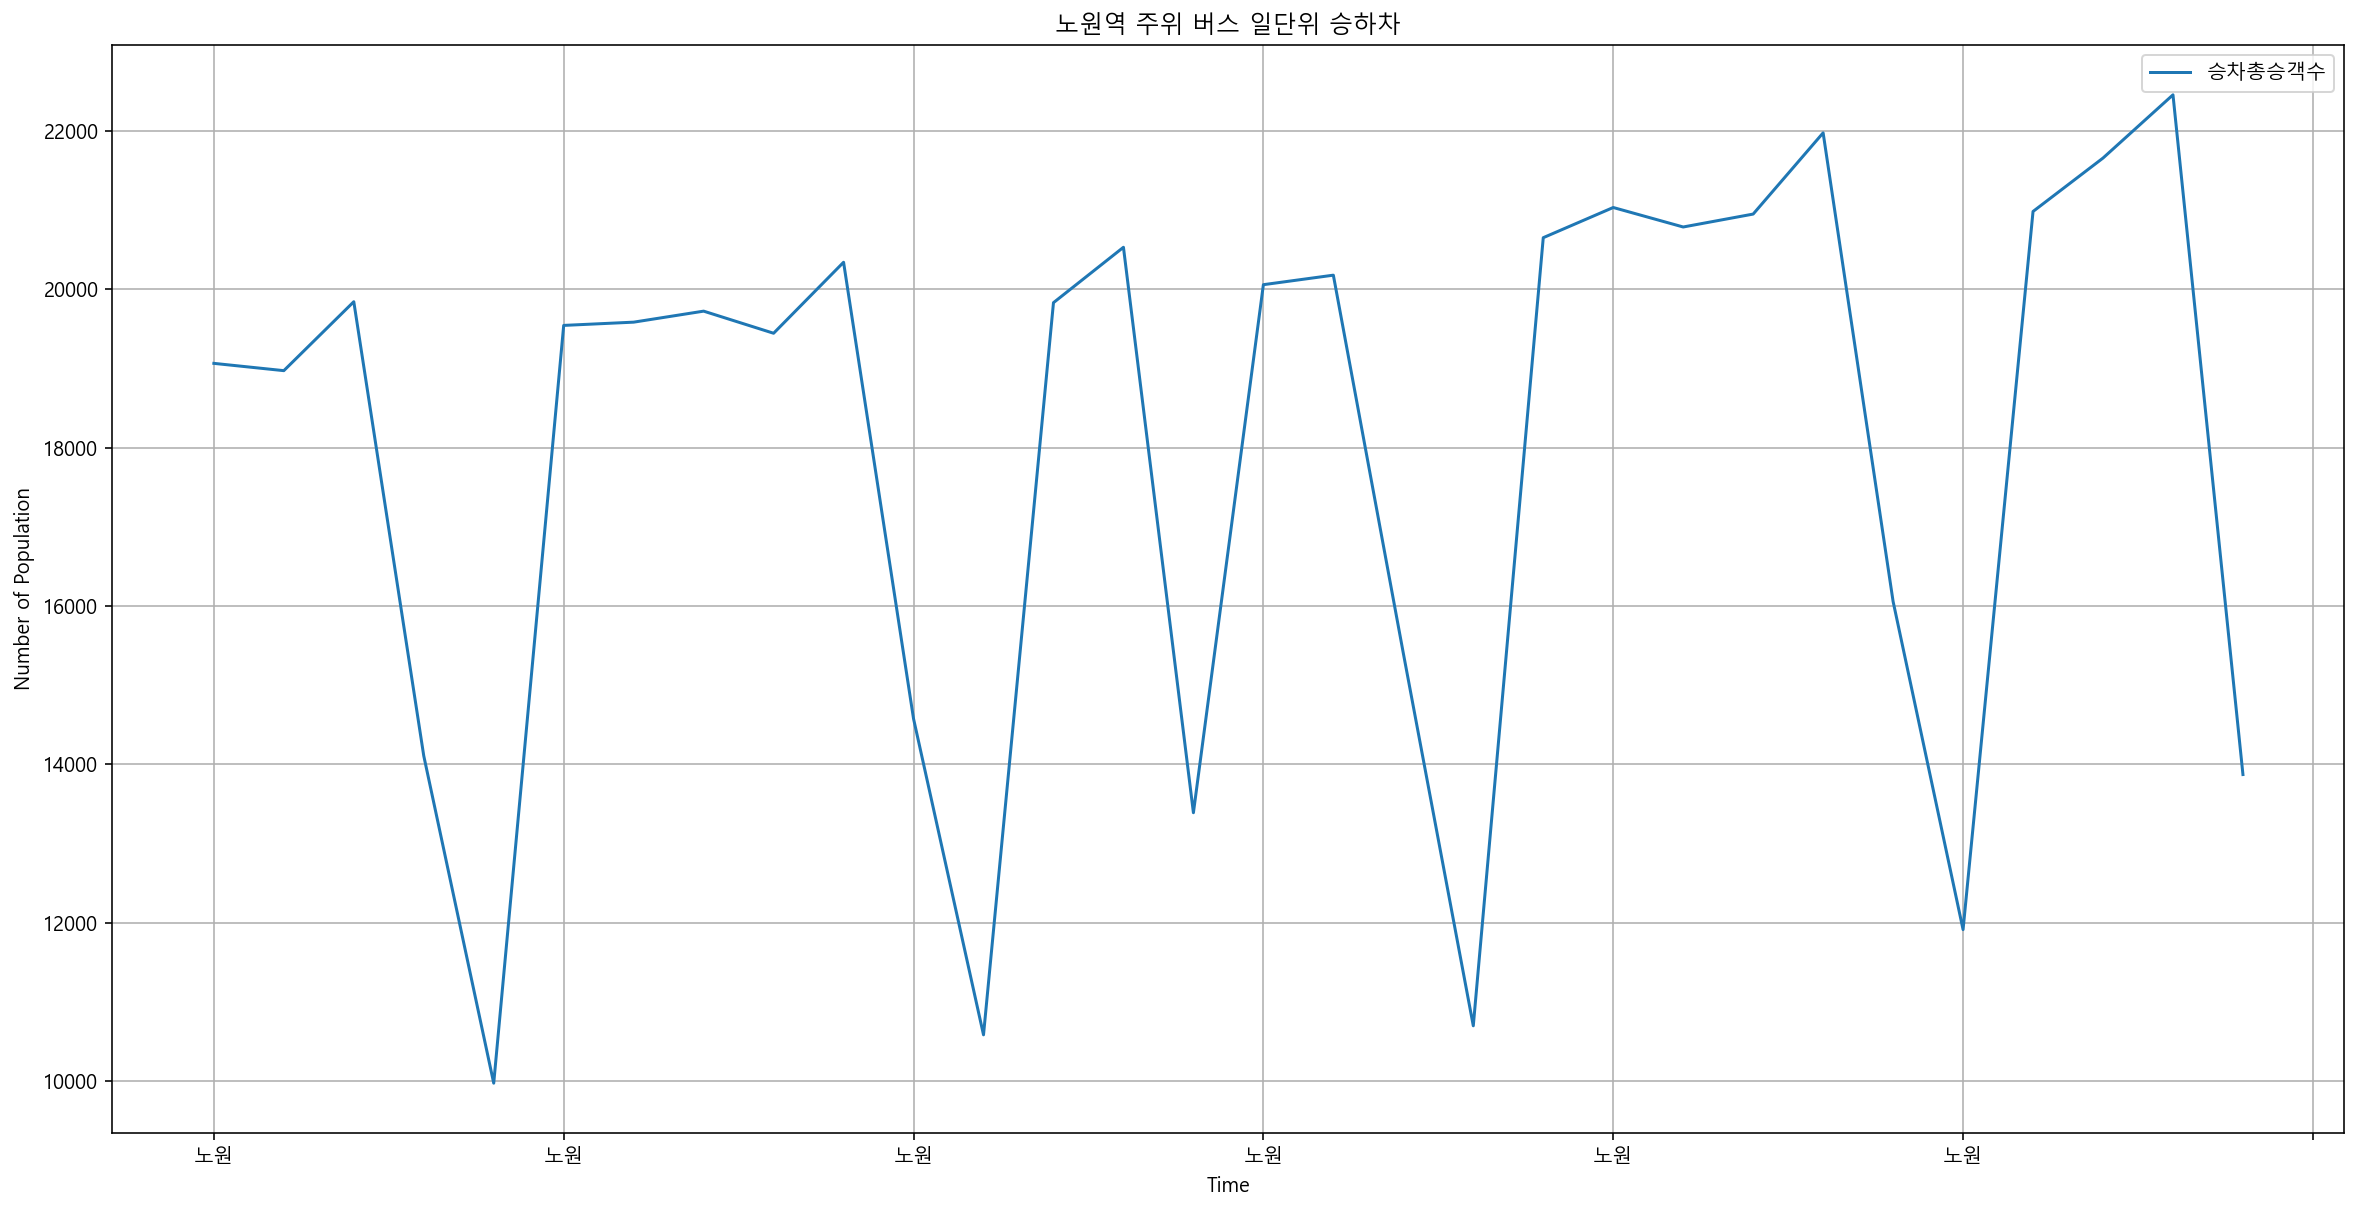

In [183]:
drawing(btT_up_4, '노원')

# 지하철 데이터랑 합치기

선결과제: 지하철데이터의 월별 변화와 버스데이터의 월별변화가 유사함을 증명해야 한다->나중에 하자

### 읽어오자

In [252]:
with open('./지하철 승차데이터_규호.pkl','rb') as up:
    train_up = pickle.load(up)

with open('./지하철 하차데이터_규호.pkl','rb') as down:
    train_down = pickle.load(down)

In [253]:
train_up = train_up.reset_index()
train_down = train_down.reset_index()

In [254]:
train_col = list(train_down.columns)
train_col

['날짜',
 '호선',
 '역명',
 '06시 이전',
 '06 ~ 07',
 '07 ~ 08',
 '08 ~ 09',
 '09 ~ 10',
 '10 ~ 11',
 '11 ~ 12',
 '12 ~ 13',
 '13 ~ 14',
 '14 ~ 15',
 '15 ~ 16',
 '16 ~ 17',
 '17 ~ 18',
 '18 ~ 19',
 '19 ~ 20',
 '20 ~ 21',
 '21 ~ 22',
 '22 ~ 23',
 '23 ~ 24',
 '24시 이후',
 '합 계']

### 버스 데이터와 일치하도록 전처리

In [255]:
train_col_need = ['사용일자', '호선', '지하철역', '06시 이전', '06 ~ 07', '07 ~ 08', '08 ~ 09', '09 ~ 10', '10 ~ 11', '11 ~ 12', '12 ~ 13', '13 ~ 14', '14 ~ 15', '15 ~ 16', '16 ~ 17', '17 ~ 18', '18 ~ 19', '19 ~ 20', '20 ~ 21', '21 ~ 22', '22 ~ 23', '23 ~ 24', '24시 이후', '합 계']

In [256]:
train_up.columns = train_col_need
train_down.columns = train_col_need

In [268]:
date_list = []
for day in list(train_down['사용일자']):
    new_day = re.sub('-','', day)
    date_list.append(int(new_day))
len(date_list)
    

41878

In [269]:
train_down['사용일자'] = date_list
train_down

,사용일자,호선,지하철역,06시 이전,06 ~ 07,07 ~ 08,08 ~ 09,09 ~ 10,10 ~ 11,11 ~ 12,...,16 ~ 17,17 ~ 18,18 ~ 19,19 ~ 20,20 ~ 21,21 ~ 22,22 ~ 23,23 ~ 24,24시 이후,합 계
0,20200101,1호선,서울역,235,952,828,1043,1694,1655,2047,...,2354,2261,1922,1696,1620,1181,768,426,77,30085
1,20200101,1호선,시청,81,223,334,570,611,612,822,...,783,849,602,435,293,273,174,149,26,10608
2,20200101,1호선,종각,71,191,295,511,855,1026,1323,...,1450,1352,1132,725,545,344,225,146,25,16401
3,20200101,1호선,종로3가,53,147,190,363,594,952,1515,...,1129,928,637,448,320,232,230,172,61,15360
4,20200101,1호선,종로5가,22,124,170,240,403,595,994,...,1099,1006,605,397,264,190,136,101,15,11997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41873,20200531,8호선,남한산성입구(성남법원.검찰청),30,80,102,151,273,329,206,...,389,366,490,404,407,492,453,218,46,5656
41874,20200531,8호선,단대오거리,42,101,124,111,147,176,169,...,300,372,351,373,321,374,352,234,41,4588
41875,20200531,8호선,신흥,13,51,42,63,80,117,120,...,186,211,223,200,133,200,124,92,7,2551
41876,20200531,8호선,수진,15,48,35,66,95,107,101,...,187,210,191,139,148,189,149,93,8,2327


In [270]:
train_up['사용일자'] = date_list
train_up

,사용일자,호선,지하철역,06시 이전,06 ~ 07,07 ~ 08,08 ~ 09,09 ~ 10,10 ~ 11,11 ~ 12,...,16 ~ 17,17 ~ 18,18 ~ 19,19 ~ 20,20 ~ 21,21 ~ 22,22 ~ 23,23 ~ 24,24시 이후,합 계
0,20200101,1호선,서울역,356,280,313,774,923,1418,2288,...,3194,3342,3002,2857,2311,2523,1830,987,25,36641
1,20200101,1호선,시청,105,118,123,206,318,309,442,...,1019,1234,1383,1271,1061,991,572,217,2,12212
2,20200101,1호선,종각,798,366,198,236,310,379,666,...,1748,1890,1879,1827,1955,1800,1259,406,6,20523
3,20200101,1호선,종로3가,338,189,153,198,311,466,673,...,1843,1898,1561,1265,1103,1009,718,288,30,17292
4,20200101,1호선,종로5가,60,50,67,143,228,368,626,...,1473,1257,976,884,823,617,361,111,2,12741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41873,20200531,8호선,남한산성입구(성남법원.검찰청),149,190,290,508,537,500,462,...,426,382,276,207,133,133,80,48,1,6149
41874,20200531,8호선,단대오거리,133,146,244,321,411,380,319,...,290,238,232,196,123,109,76,35,0,4625
41875,20200531,8호선,신흥,75,70,114,143,174,160,131,...,183,160,125,98,112,93,45,24,1,2392
41876,20200531,8호선,수진,55,76,116,179,202,160,171,...,192,174,137,99,96,89,49,35,1,2612


In [271]:
train_down[train_down['지하철역']=='서울역']

,사용일자,호선,지하철역,06시 이전,06 ~ 07,07 ~ 08,08 ~ 09,09 ~ 10,10 ~ 11,11 ~ 12,...,16 ~ 17,17 ~ 18,18 ~ 19,19 ~ 20,20 ~ 21,21 ~ 22,22 ~ 23,23 ~ 24,24시 이후,합 계
0,20200101,1호선,서울역,235,952,828,1043,1694,1655,2047,...,2354,2261,1922,1696,1620,1181,768,426,77,30085
110,20200101,4호선,서울역,54,412,437,323,646,691,717,...,1069,1199,1026,956,865,719,579,386,126,14252
275,20200102,1호선,서울역,306,2076,4353,10013,5983,2952,2592,...,2503,2891,3097,2262,1464,1359,1073,578,244,53848
385,20200102,4호선,서울역,52,606,1870,4609,2088,1102,1035,...,1289,1382,1530,1126,838,786,771,386,173,23885
550,20200103,1호선,서울역,240,1771,3894,9730,6445,3024,2667,...,3158,3828,4750,3861,1922,1537,1335,860,372,61101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41162,20200529,4호선,서울역,23,384,1410,3784,1739,725,612,...,861,1176,1342,1018,571,425,430,325,77,17728
41327,20200530,1호선,서울역,188,1036,1127,1544,2293,1934,1898,...,1556,1648,1291,1051,982,835,615,387,11,25595
41437,20200530,4호선,서울역,18,260,331,549,614,545,520,...,741,730,536,508,443,433,365,237,58,9604
41603,20200531,1호선,서울역,89,448,542,844,1212,1042,1000,...,1469,1491,1305,1235,1097,779,485,251,22,18694


## 다른호선, 같은역은 그냥 합쳐주자

In [272]:
# 같은 역은 호선이 달라도 그냥 합쳐주자
group_down = train_down.groupby(['사용일자', '지하철역']).sum()
group_down = group_down.reset_index()
group_down

,사용일자,지하철역,06시 이전,06 ~ 07,07 ~ 08,08 ~ 09,09 ~ 10,10 ~ 11,11 ~ 12,12 ~ 13,...,16 ~ 17,17 ~ 18,18 ~ 19,19 ~ 20,20 ~ 21,21 ~ 22,22 ~ 23,23 ~ 24,24시 이후,합 계
0,20200101,가락시장,40,181,172,325,412,377,468,466,...,553,630,516,393,318,308,288,248,55,7220
1,20200101,가산디지털단지,72,161,191,250,549,511,806,1030,...,915,783,516,454,330,302,251,170,8,10585
2,20200101,강남,199,725,848,1054,1780,1683,1924,2592,...,3255,3360,3274,2362,1768,1520,1234,803,6,37007
3,20200101,강남구청,26,131,123,255,341,243,220,183,...,259,306,221,180,176,189,116,110,16,3818
4,20200101,강동,25,279,220,272,310,348,390,430,...,625,678,693,577,565,606,586,403,74,8719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36786,20200531,홍제,28,171,158,271,366,427,303,384,...,661,656,697,546,522,570,509,289,3,8118
36787,20200531,화곡,28,180,150,212,329,365,353,570,...,904,1009,899,891,967,961,903,501,35,11321
36788,20200531,화랑대(서울여대입구),16,60,75,153,217,183,203,171,...,253,279,270,260,253,294,234,195,13,3795
36789,20200531,회현(남대문시장),7,144,226,363,1047,951,819,748,...,342,280,190,130,89,146,95,48,4,7249


In [273]:
# 같은 역은 호선이 달라도 그냥 합쳐주자
group_up = train_up.groupby(['사용일자', '지하철역']).sum()
group_up = group_up.reset_index()
group_up

,사용일자,지하철역,06시 이전,06 ~ 07,07 ~ 08,08 ~ 09,09 ~ 10,10 ~ 11,11 ~ 12,12 ~ 13,...,16 ~ 17,17 ~ 18,18 ~ 19,19 ~ 20,20 ~ 21,21 ~ 22,22 ~ 23,23 ~ 24,24시 이후,합 계
0,20200101,가락시장,126,177,163,204,283,390,427,513,...,513,534,546,365,356,328,270,85,3,6940
1,20200101,가산디지털단지,120,144,155,237,273,255,374,482,...,1203,1322,1235,967,664,965,300,136,0,11290
2,20200101,강남,1844,1465,877,763,763,908,1167,1514,...,2687,3108,3006,2676,3082,3779,3859,1761,6,39422
3,20200101,강남구청,81,123,82,102,120,123,117,157,...,202,291,265,222,251,312,286,108,1,3562
4,20200101,강동,217,299,309,408,476,579,599,693,...,700,698,681,464,396,392,214,96,0,9223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36786,20200531,홍제,134,245,313,500,656,656,659,840,...,610,552,426,324,278,218,126,65,2,8557
36787,20200531,화곡,290,379,587,992,1140,893,940,1014,...,721,658,530,451,368,326,246,91,0,12211
36788,20200531,화랑대(서울여대입구),81,126,180,330,347,372,316,413,...,292,277,193,148,121,110,69,39,0,4424
36789,20200531,회현(남대문시장),36,64,73,100,126,184,232,392,...,552,598,902,484,839,256,119,37,1,6656


### 각 시간을 합계로 나눠주고, 거기에 위의 버스 승하차인구 곱해주기

In [279]:
bt_down_2.reset_index()

,지하철역,사용일자,역명,하차총승객수
0,가락시장,20200201,가락시장.가락몰,455
1,가락시장,20200201,가락시장.가락시장역,3990
2,가락시장,20200201,가락시장남문,219
3,가락시장,20200201,가락시장역,379
4,가락시장,20200201,건너말공원입구,467
...,...,...,...,...
188510,효창공원앞,20200229,효창공원삼거리.윤봉길의사등묘역,68
188511,효창공원앞,20200229,효창공원앞역,759
188512,효창공원앞,20200229,효창공원역,149
188513,효창공원앞,20200229,효창공원후문,291


In [280]:
#지하철, 사용일자 기준으로 각각의 버스정류장 하차승객수를 매칭시켜주기
bt_group_down_2 = pd.merge(group_down, bt_down_2, how='inner', on=['사용일자', '지하철역'])
bt_group_down_2

,사용일자,지하철역,06시 이전,06 ~ 07,07 ~ 08,08 ~ 09,09 ~ 10,10 ~ 11,11 ~ 12,12 ~ 13,...,18 ~ 19,19 ~ 20,20 ~ 21,21 ~ 22,22 ~ 23,23 ~ 24,24시 이후,합 계,역명,하차총승객수
0,20200201,가락시장,92,301,328,535,635,651,704,785,...,952,695,477,454,394,342,125,12029,가락시장.가락몰,455
1,20200201,가락시장,92,301,328,535,635,651,704,785,...,952,695,477,454,394,342,125,12029,가락시장.가락시장역,3990
2,20200201,가락시장,92,301,328,535,635,651,704,785,...,952,695,477,454,394,342,125,12029,가락시장남문,219
3,20200201,가락시장,92,301,328,535,635,651,704,785,...,952,695,477,454,394,342,125,12029,가락시장역,379
4,20200201,가락시장,92,301,328,535,635,651,704,785,...,952,695,477,454,394,342,125,12029,건너말공원입구,467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187466,20200229,효창공원앞,24,64,72,116,154,120,171,141,...,183,135,164,131,121,113,12,2607,효창공원삼거리.윤봉길의사등묘역,68
187467,20200229,효창공원앞,24,64,72,116,154,120,171,141,...,183,135,164,131,121,113,12,2607,효창공원앞역,759
187468,20200229,효창공원앞,24,64,72,116,154,120,171,141,...,183,135,164,131,121,113,12,2607,효창공원역,149
187469,20200229,효창공원앞,24,64,72,116,154,120,171,141,...,183,135,164,131,121,113,12,2607,효창공원후문,291


In [282]:
bt_group_down_2.head(50)

,사용일자,지하철역,06시 이전,06 ~ 07,07 ~ 08,08 ~ 09,09 ~ 10,10 ~ 11,11 ~ 12,12 ~ 13,...,18 ~ 19,19 ~ 20,20 ~ 21,21 ~ 22,22 ~ 23,23 ~ 24,24시 이후,합 계,역명,하차총승객수
0,20200201,가락시장,92,301,328,535,635,651,704,785,...,952,695,477,454,394,342,125,12029,가락시장.가락몰,455
1,20200201,가락시장,92,301,328,535,635,651,704,785,...,952,695,477,454,394,342,125,12029,가락시장.가락시장역,3990
2,20200201,가락시장,92,301,328,535,635,651,704,785,...,952,695,477,454,394,342,125,12029,가락시장남문,219
3,20200201,가락시장,92,301,328,535,635,651,704,785,...,952,695,477,454,394,342,125,12029,가락시장역,379
4,20200201,가락시장,92,301,328,535,635,651,704,785,...,952,695,477,454,394,342,125,12029,건너말공원입구,467
5,20200201,가락시장,92,301,328,535,635,651,704,785,...,952,695,477,454,394,342,125,12029,경찰병원.서울동부고용노동지청,783
6,20200201,가락시장,92,301,328,535,635,651,704,785,...,952,695,477,454,394,342,125,12029,문정2동주민센터.청소년수련관,374
7,20200201,가락시장,92,301,328,535,635,651,704,785,...,952,695,477,454,394,342,125,12029,제일오피스텔,486
8,20200201,가락시장,92,301,328,535,635,651,704,785,...,952,695,477,454,394,342,125,12029,훼미리근린공원,296
9,20200201,가산디지털단지,97,450,428,994,1233,881,938,1075,...,726,440,353,292,270,237,30,13285,7호선가산디지털단지역,161


### merge 된다. 이제 각 (시간별하차/총합)과 하차승객을 곱해서 데이터프레임화 시키면 완성 

In [284]:
time_col = ['06시 이전', '06 ~ 07', '07 ~ 08', '08 ~ 09', '09 ~ 10', '10 ~ 11', '11 ~ 12', '12 ~ 13', '13 ~ 14', '14 ~ 15', '15 ~ 16', '16 ~ 17', '17 ~ 18', '18 ~ 19', '19 ~ 20', '20 ~ 21', '21 ~ 22', '22 ~ 23', '23 ~ 24', '24시 이후']

In [337]:
bt_group_down_2.loc[0][2:-3] * bt_group_down_2.loc[0][-1] / bt_group_down_2.loc[0][-3]

06시 이전     3.47992
06 ~ 07    11.3854
07 ~ 08    12.4067
08 ~ 09    20.2365
09 ~ 10     24.019
10 ~ 11    24.6242
11 ~ 12     26.629
12 ~ 13    29.6928
13 ~ 14    30.6763
14 ~ 15    30.1467
15 ~ 16    36.6148
16 ~ 17    33.6267
17 ~ 18    41.3808
18 ~ 19    36.0096
19 ~ 20    26.2886
20 ~ 21    18.0426
21 ~ 22    17.1727
22 ~ 23    14.9032
23 ~ 24    12.9362
24시 이후     4.72816
Name: 0, dtype: object

In [298]:
bus_df_list=[]
for i in tqdm(range(len(bt_group_down_2))):
    bus_df_list.append([bt_group_down_2.loc[i][2:-3] * bt_group_down_2.loc[i][-1] / bt_group_down_2.loc[i][-3]])

In [334]:
k = pd.DataFrame(bus_df_list[0])
k

,06시 이전,06 ~ 07,07 ~ 08,08 ~ 09,09 ~ 10,10 ~ 11,11 ~ 12,12 ~ 13,13 ~ 14,14 ~ 15,15 ~ 16,16 ~ 17,17 ~ 18,18 ~ 19,19 ~ 20,20 ~ 21,21 ~ 22,22 ~ 23,23 ~ 24,24시 이후
0,3.479924,11.385402,12.406684,20.236512,24.019037,24.624241,26.62898,29.692826,30.676282,30.146729,36.614847,33.626652,41.38083,36.009643,26.288553,18.042647,17.172666,14.903151,12.936237,4.728157


In [347]:
temp_df=pd.DataFrame(bus_df_list[0][0])
for idx, i in tqdm(enumerate(bus_df_list)):
    temp_df[idx] = i[0].to_frame()
temp_df    

,0,1,2,3,4,5,6,7,8,9,...,187461,187462,187463,187464,187465,187466,187467,187468,187469,187470
06시 이전,3.47992,30.5163,1.67495,2.89866,3.5717,5.98853,2.86042,3.71702,2.26386,1.17554,...,0.18412,0.174914,1.19678,0.929804,1.3901,0.626007,6.98734,1.37169,2.67894,1.25201
06 ~ 07,11.3854,99.8412,5.48001,9.48366,11.6857,19.5929,9.35855,12.1611,7.40677,5.45352,...,0.490986,0.466437,3.19141,2.47948,3.70694,1.66935,18.6329,3.65784,7.14384,3.3387
07 ~ 08,12.4067,108.797,5.97157,10.3344,12.7339,21.3504,10.198,13.252,8.07116,5.1869,...,0.552359,0.524741,3.59033,2.78941,4.17031,1.87802,20.962,4.11507,8.03682,3.75604
08 ~ 09,20.2365,177.459,9.74021,16.8563,20.7702,34.8246,16.634,21.6153,13.1649,12.0462,...,0.889912,0.845416,5.78443,4.49405,6.71883,3.0257,33.7722,6.62984,12.9482,6.0514
09 ~ 10,24.019,210.628,11.5608,20.0071,24.6525,41.3339,19.7431,25.6555,15.6256,14.9426,...,1.18143,1.12236,7.67932,5.96624,8.91983,4.01688,44.8354,8.80169,17.1899,8.03376
10 ~ 11,24.6242,215.936,11.8521,20.5112,25.2737,42.3753,20.2406,26.3019,16.0193,10.6768,...,0.920598,0.874568,5.98389,4.64902,6.95052,3.13003,34.9367,6.85846,13.3947,6.26007
11 ~ 12,26.629,233.516,12.817,22.1811,27.3313,45.8253,21.8884,28.4433,17.3235,11.3676,...,1.31185,1.24626,8.52704,6.62486,9.90449,4.4603,49.7848,9.7733,19.0875,8.9206
12 ~ 13,29.6928,260.383,14.2917,24.7331,30.4759,51.0978,24.4069,31.7159,19.3167,13.0279,...,1.0817,1.02762,7.03107,5.4626,8.16686,3.67779,41.0506,8.05869,15.7388,7.35558
13 ~ 14,30.6763,269.007,14.7651,25.5523,31.4853,52.7902,25.2152,32.7663,19.9564,13.0642,...,1.23514,1.17338,8.02839,6.23744,9.32528,4.19946,46.8734,9.20176,17.9712,8.39893
14 ~ 15,30.1467,264.364,14.5102,25.1112,30.9418,51.8789,24.7799,32.2007,19.6119,12.3492,...,1.39624,1.32643,9.07557,7.05102,10.5416,4.74722,52.9873,10.402,20.3153,9.49444


In [359]:
k = temp_df.T
k['사용일자'] = bt_group_down_2['사용일자']
k['지하철역'] = bt_group_down_2['지하철역']
k['역명'] = bt_group_down_2['역명']
k = k[['사용일자', '지하철역', '역명', '06시 이전', '06 ~ 07', '07 ~ 08', '08 ~ 09', '09 ~ 10', '10 ~ 11', '11 ~ 12', '12 ~ 13', '13 ~ 14', '14 ~ 15', '15 ~ 16', '16 ~ 17','17 ~ 18', '18 ~ 19', '19 ~ 20', '20 ~ 21', '21 ~ 22', '22 ~ 23', '23 ~ 24', '24시 이후']]
k

,사용일자,지하철역,역명,06시 이전,06 ~ 07,07 ~ 08,08 ~ 09,09 ~ 10,10 ~ 11,11 ~ 12,...,15 ~ 16,16 ~ 17,17 ~ 18,18 ~ 19,19 ~ 20,20 ~ 21,21 ~ 22,22 ~ 23,23 ~ 24,24시 이후
0,20200201,가락시장,가락시장.가락몰,3.47992,11.3854,12.4067,20.2365,24.019,24.6242,26.629,...,36.6148,33.6267,41.3808,36.0096,26.2886,18.0426,17.1727,14.9032,12.9362,4.72816
1,20200201,가락시장,가락시장.가락시장역,30.5163,99.8412,108.797,177.459,210.628,215.936,233.516,...,321.084,294.88,362.878,315.777,230.53,158.22,150.591,130.689,113.441,41.4623
2,20200201,가락시장,가락시장남문,1.67495,5.48001,5.97157,9.74021,11.5608,11.8521,12.817,...,17.6234,16.1851,19.9174,17.3321,12.6532,8.68426,8.26552,7.17316,6.22645,2.27575
3,20200201,가락시장,가락시장역,2.89866,9.48366,10.3344,16.8563,20.0071,20.5112,22.1811,...,30.499,28.0099,34.4689,29.9948,21.8975,15.0289,14.3043,12.4138,10.7755,3.9384
4,20200201,가락시장,건너말공원입구,3.5717,11.6857,12.7339,20.7702,24.6525,25.2737,27.3313,...,37.5805,34.5135,42.4722,36.9593,26.9819,18.5185,17.6256,15.2962,13.2774,4.85286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187466,20200229,효창공원앞,효창공원삼거리.윤봉길의사등묘역,0.626007,1.66935,1.87802,3.0257,4.01688,3.13003,4.4603,...,4.95589,4.06904,5.13847,4.7733,3.52129,4.27771,3.41695,3.15612,2.94745,0.313003
187467,20200229,효창공원앞,효창공원앞역,6.98734,18.6329,20.962,33.7722,44.8354,34.9367,49.7848,...,55.3165,45.4177,57.3544,53.2785,39.3038,47.7468,38.1392,35.2278,32.8987,3.49367
187468,20200229,효창공원앞,효창공원역,1.37169,3.65784,4.11507,6.62984,8.80169,6.85846,9.7733,...,10.8592,8.916,11.2593,10.4591,7.71577,9.37323,7.48715,6.91561,6.45838,0.685846
187469,20200229,효창공원앞,효창공원후문,2.67894,7.14384,8.03682,12.9482,17.1899,13.3947,19.0875,...,21.2083,17.4131,21.9896,20.4269,15.069,18.3061,14.6226,13.5063,12.6133,1.33947


## 지하철과 버스 월별 승하차 유사도 구하기

In [360]:
group_up

,사용일자,지하철역,06시 이전,06 ~ 07,07 ~ 08,08 ~ 09,09 ~ 10,10 ~ 11,11 ~ 12,12 ~ 13,...,16 ~ 17,17 ~ 18,18 ~ 19,19 ~ 20,20 ~ 21,21 ~ 22,22 ~ 23,23 ~ 24,24시 이후,합 계
0,20200101,가락시장,126,177,163,204,283,390,427,513,...,513,534,546,365,356,328,270,85,3,6940
1,20200101,가산디지털단지,120,144,155,237,273,255,374,482,...,1203,1322,1235,967,664,965,300,136,0,11290
2,20200101,강남,1844,1465,877,763,763,908,1167,1514,...,2687,3108,3006,2676,3082,3779,3859,1761,6,39422
3,20200101,강남구청,81,123,82,102,120,123,117,157,...,202,291,265,222,251,312,286,108,1,3562
4,20200101,강동,217,299,309,408,476,579,599,693,...,700,698,681,464,396,392,214,96,0,9223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36786,20200531,홍제,134,245,313,500,656,656,659,840,...,610,552,426,324,278,218,126,65,2,8557
36787,20200531,화곡,290,379,587,992,1140,893,940,1014,...,721,658,530,451,368,326,246,91,0,12211
36788,20200531,화랑대(서울여대입구),81,126,180,330,347,372,316,413,...,292,277,193,148,121,110,69,39,0,4424
36789,20200531,회현(남대문시장),36,64,73,100,126,184,232,392,...,552,598,902,484,839,256,119,37,1,6656


In [372]:
train_up_sum = group_up.groupby(['지하철역', '사용일자']).sum()
train_down_sum = group_down.groupby(['지하철역', '사용일자']).sum()

In [374]:
train_up_sum

06시 이전  06 ~ 07  07 ~ 08  08 ~ 09  09 ~ 10  10 ~ 11  11 ~ 12  \
지하철역  사용일자                                                                     
가락시장  20200101     126      177      163      204      283      390      427   
      20200102     122      387     1208     1488      972      853      876   
      20200103     183      444     1276     1682     1089      949     1005   
      20200104     153      267      431      707      762      838      970   
      20200105      91      125      172      312      456      493      479   
...                ...      ...      ...      ...      ...      ...      ...   
효창공원앞 20200527      85      208      673     1060      538      291      293   
      20200528      91      185      649     1048      513      287      291   
      20200529     102      201      620     1015      530      269      264   
      20200530      75       97      153      262      312      334      296   
      20200531      41       75       99      178      236      232      220   

                12 ~ 13  13 ~ 14  14 ~ 15  ...  16 ~ 17  17 ~ 18  18 ~ 19  \
지하철역  사용일자                                 ...                              
가락시장  20200101      513      484      550  ...      513      534      546   
      20200102      870      944      979  ...     1224     1390     2706   
      20200103     1007     1105     1117  ...     1285     1625     2887   
      20200104     1194     1241     1178  ...     1083     1067      848   
      20200105      606      753      785  ...      751      697      550   
...                 ...      ...      ...  ...      ...      ...      ...   
효창공원앞 20200527      249      274      281  ...      388      559      869   
      20200528      302      324      278  ...      375      529      851   
      20200529      228      272      303  ...      390      583      857   
      20200530      300      310      330  ...      273      309      264   
      20200531      253      210      208  ...      183      177      164   

                19 ~ 20  20 ~ 21  21 ~ 22  22 ~ 23  23 ~ 24  24시 이후    합 계  
지하철역  사용일자                                                                  
가락시장  20200101      365      356      328      270       85       3   6940  
      20200102     1073      850      777      654      294      77  18851  
      20200103     1250      966      926      814      463      93  21399  
      20200104      608      608      627      641      213       8  14652  
      20200105      484      391      446      319      117       2   8831  
...                 ...      ...      ...      ...      ...     ...    ...  
효창공원앞 20200527      423      259      267      153       61       1   7196  
      20200528      439      209      247      175       69       3   7174  
      20200529      498      213      204      173       65       0   7114  
      20200530      171      163      158      122       29       0   4299  
      20200531      110       96      103       82       19       0   2899  

[36791 rows x 21 columns]

In [381]:
gr = train_down_sum.loc['가락시장']

In [390]:
gr = gr.reset_index()
gr

,사용일자,06시 이전,06 ~ 07,07 ~ 08,08 ~ 09,09 ~ 10,10 ~ 11,11 ~ 12,12 ~ 13,13 ~ 14,...,16 ~ 17,17 ~ 18,18 ~ 19,19 ~ 20,20 ~ 21,21 ~ 22,22 ~ 23,23 ~ 24,24시 이후,합 계
0,20200101,40,181,172,325,412,377,468,466,485,...,553,630,516,393,318,308,288,248,55,7220
1,20200102,90,352,970,3025,1303,906,873,871,962,...,1059,1252,1923,1616,871,762,698,446,197,20260
2,20200103,119,465,896,3254,1310,920,949,977,993,...,1178,1452,2494,1962,1110,750,858,549,309,22661
3,20200104,88,305,375,616,715,785,996,1058,967,...,1303,1416,1182,836,613,525,512,378,157,14919
4,20200105,29,176,143,307,416,596,623,699,702,...,804,879,799,636,568,520,397,334,90,10132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,20200527,118,469,1025,2962,1377,811,724,758,799,...,891,1167,1814,1191,804,669,614,314,115,18306
148,20200528,126,446,963,2904,1370,809,763,695,755,...,879,1109,1711,1286,788,665,630,322,135,17954
149,20200529,126,491,942,2853,1429,812,701,760,701,...,1002,1316,1960,1326,947,697,618,361,175,18936
150,20200530,105,365,379,581,706,671,738,645,761,...,917,926,811,631,445,391,361,274,72,11338


In [400]:
gr['사용일자'][0]

numpy.int64

In [401]:
gr[gr['사용일자']==20200101]

,사용일자,06시 이전,06 ~ 07,07 ~ 08,08 ~ 09,09 ~ 10,10 ~ 11,11 ~ 12,12 ~ 13,13 ~ 14,...,16 ~ 17,17 ~ 18,18 ~ 19,19 ~ 20,20 ~ 21,21 ~ 22,22 ~ 23,23 ~ 24,24시 이후,합 계
0,20200101,40,181,172,325,412,377,468,466,485,...,553,630,516,393,318,308,288,248,55,7220


MultiIndex([( '가락시장', 20200101),
            ( '가락시장', 20200102),
            ( '가락시장', 20200103),
            ( '가락시장', 20200104),
            ( '가락시장', 20200105),
            ( '가락시장', 20200106),
            ( '가락시장', 20200107),
            ( '가락시장', 20200108),
            ( '가락시장', 20200109),
            ( '가락시장', 20200110),
            ...
            ('효창공원앞', 20200522),
            ('효창공원앞', 20200523),
            ('효창공원앞', 20200524),
            ('효창공원앞', 20200525),
            ('효창공원앞', 20200526),
            ('효창공원앞', 20200527),
            ('효창공원앞', 20200528),
            ('효창공원앞', 20200529),
            ('효창공원앞', 20200530),
            ('효창공원앞', 20200531)],
           names=['지하철역', '사용일자'], length=36791)